# Impute Images Script
After creating a bunch of image data like this:
https://openprocessing.org/sketch/2707919

Create a folder by this notebook, then adjust the path below and run the function.
Run the final cell to save the images as a numpy array that the model can accept in its current form.

In [ ]:
import os
import numpy as np
from PIL import Image

def images_to_numpy(folder_path, size=(28, 28), normalize=True):
    """
    Convert all images in a folder into a NumPy array of flattened grayscale vectors.

    Parameters:
        folder_path (str): path to the folder with images
        size (tuple): target size, default (28, 28)
        normalize (bool): if True, scale values to [0,1] floats

    Returns:
        np.ndarray: shape (N, size[0]*size[1]) where N = number of images
    """
    data = []

    for fname in os.listdir(folder_path):
        if fname.lower().endswith((".jpg", ".jpeg", ".png")):
            path = os.path.join(folder_path, fname)

            # open, convert to grayscale, resize
            img = Image.open(path).convert("L").resize(size)

            arr = np.array(img, dtype=np.float32)

            # normalize if requested
            if normalize:
                arr = arr / 255.0

            # flatten
            data.append(arr.flatten())

    return np.vstack(data)

# Example usage:
folder = "Images/" #UPDATE to your folder name where your images to convert are stored
X = images_to_numpy(folder) #also pass normalize=False if your images are already greyscale (most are RGB)

print("Shape:", X.shape)      # e.g. (number_of_images, 784)
print("First row snippet:", X[0][:20])

Shape: (511, 784)
First row snippet: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [2]:
# --- Save to disk ---
out_path = "my_p5_images.npy" #update the file name
np.save(out_path, X)

print(f"Saved {X.shape} array to {out_path}")

Saved (511, 784) array to my_p5_images.npy


In [ ]:
# --- Load it back (example) ---
# X_loaded = np.load(out_path)
# print("Loaded shape:", X_loaded.shape)

Loaded shape: (511, 784)


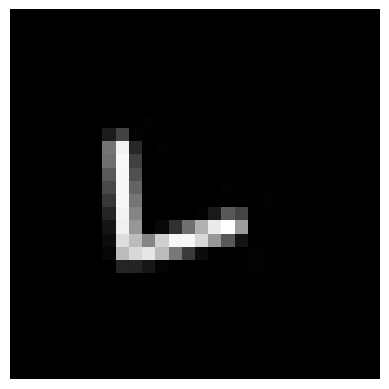

In [ ]:
import matplotlib.pyplot as plt

# Pick one example from your loaded array
# idx = 0   # change this index to see different images
# img = X_loaded[idx].reshape(28, 28)

# plt.imshow(img, cmap="gray")
# plt.axis("off")
# plt.show()